___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://cdn.corporatefinanceinstitute.com/assets/Time-Series-Analysis-1200x854.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Ana Rosaura Zamarrón Álvarez </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `ana.zamarron@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://cdn.corporatefinanceinstitute.com/assets/Time-Series-Analysis-1200x854.png</p>

### <font color= #2E9AFE> Tema: Series de Tiempo</font>

#### ¿Por qué el análisis de las series de tiempo?

En este análisis sólo tenemos una variable que está basada en el **Tiempo**

Se puede analizar los datos de la serie de tiempo para extraer estadísticas y otras características.

Ejemplo:
- Precios de la acción de la bolsa de valores
- Ventas de una empresa a lo largo del tiempo

#### ¿Qué son las series de tiempo?

Una serie de tiempo es un conjunto de observaciones tomadas en tiempos específicos usualmente en intervalos iguales. 

Son utilizadas para predecir valores futuros basados en valores pasados. 

#### Componentes de las series de tiempo

- Tendencia
- Estacionalidad
- Iregularidad
- Ciclicidad

#### ¿Cuándo no utilizar las series de tiempo?

- Cuando hay valores constantes
- Valores en forma de funciones

#### ¿Qué es estacionariedad?

Las series de tiempo tienen un comportamiento particular a lo largo del tiempo, existe muy alta probabilidad que va a seguir el mismo comportamiento en el futuro. 

Características de una serie estacionaria:
- Media constante
- Varianza constante
- Autocovarianza que no dependa del tiempo

#### Modelos ARIMA

Los modelos ARIMA están hechos por 2 modelos:
- AR (Auto Regregressive)
- MA (Moving Average)

### Ejemplo

Vamos a construir un modelo para predecir la demanda (tráfico de pasajeros) en aerolíneas. Los datos están clasificados en fecha/tiempo y los pasajeros que viajan al mes

In [1]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [3]:
#Cargar datos
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
type(data.Month[0])

str

In [6]:
#Convertir string a fecha
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
#Hacer que el index sea la variable Month
df = data.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.shape

(144, 1)

#### Explorando los datos

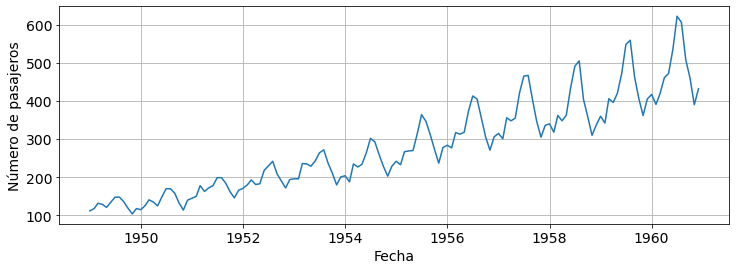

In [8]:
#Graficar serie de tiempo
plt.rcParams['figure.figsize']=(12,4)
plt.rcParams['axes.grid']=True
plt.rcParams['font.size']=14

plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.plot(df)
plt.show()

#¿Qué creen? es estacionaria o no es estacionaria?

In [9]:
#Determinar estadísticas (rolling statistics)

#Moving Average
rolmean = df.rolling(window=12).mean() #12 porque los datos son mensuales
rolstd = df.rolling(window=12).std()
print(rolmean.head(24))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667


In [10]:
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [11]:
(112+118+132+129+121+135+148+148+136+119+104+118)/12

126.66666666666667

In [12]:
print(rolstd[0:24])

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977
1950-04-01    13.822467
1950-05-01    13.663710
1950-06-01    14.760718
1950-07-01    18.135016
1950-08-01    20.797727
1950-09-01    21.928949
1950-10-01    21.315807
1950-11-01    20.067311
1950-12-01    19.070841


#### Revisar estacionariedad con rolling mean y standard deviation

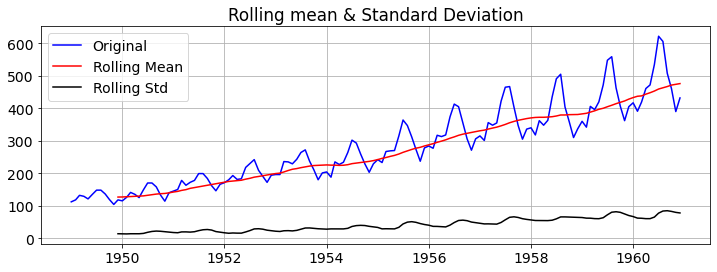

In [13]:
#Graficar rolling statistics:
original = plt.plot(df, color='blue', label='Original')
promedio = plt.plot(rolmean, color='red', label='Rolling Mean')
std= plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean & Standard Deviation')
plt.show(block=False)

Claramente la serie no es estacionaria

#### Revisar si la serie es estacionaria con la prueba de Dickey Fuller

In [14]:
#Prueba de Dickey-Fuller

dftest = adfuller(df['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Valor Critico (%s)'%key]=value
    
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Valor Critico (1%)              -3.481682
Valor Critico (5%)              -2.884042
Valor Critico (10%)             -2.578770
dtype: float64


El valor de más interés es el resultado del "p-value", queremos que este valor sea menor a 0.05. 
En este caso no es menor, por lo tanto la serie NO es estacionaria y no podemos rechazar la hipótesis nula 

#### Hacer pruebas anteriores en una sola función


In [15]:
def test_stationarity(datos):
    #Rolling statistics
    movingAverage = datos.rolling(window=12).mean()
    movingStd = datos.rolling(window=12).std()
    
    #graficar
    original = plt.plot(datos, color='blue', label='Original')
    promedio = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std= plt.plot(movingStd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
    
    #Dickey fullet
    dftest = adfuller(datos['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Valor Critico (%s)'%key]=value
    print(dfoutput)

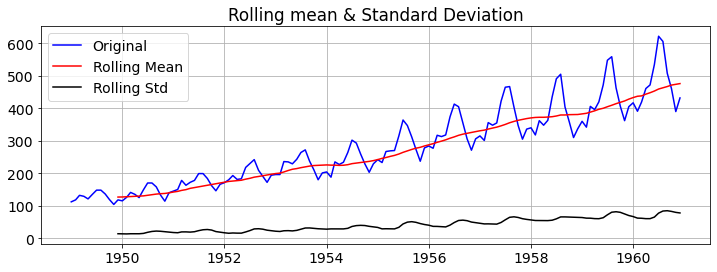

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Valor Critico (1%)              -3.481682
Valor Critico (5%)              -2.884042
Valor Critico (10%)             -2.578770
dtype: float64


In [16]:
test_stationarity(df)

#### Convertir datos NO estacionarios a datos estacionarios

- Logaritmo
- Restando simples promedios móviles
- Restando promedios móviles exponenciales
- Restando el valor anterior (más popular)
- Descomposición estacional
- Combinación de los anteriores

**1. Logaritmo**

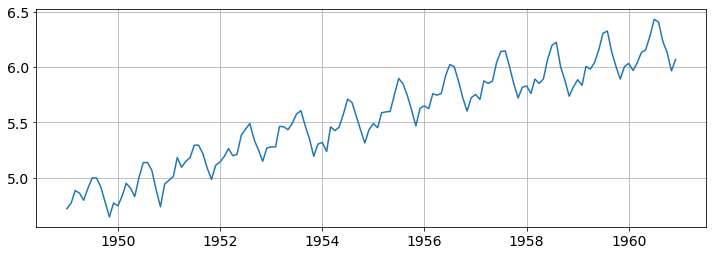

In [17]:
#Estimar la tendencia
df_log = np.log(df)
plt.plot(df_log)

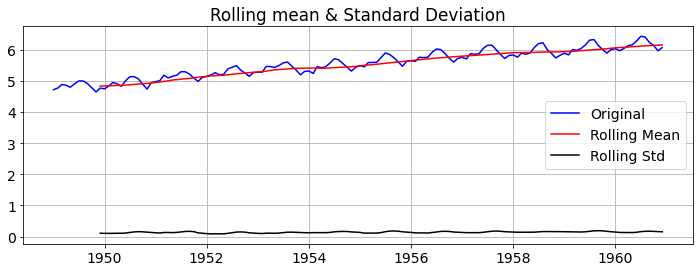

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Valor Critico (1%)              -3.481682
Valor Critico (5%)              -2.884042
Valor Critico (10%)             -2.578770
dtype: float64


In [18]:
test_stationarity(df_log)

Sigue sin ser estacionaria la serie pero sí mejora un poco

**2. Restando el promedio móvil simple**

In [19]:
movingAverage = df_log.rolling(window=12).mean()
df_log_menos_ma = df_log - movingAverage
df_log_menos_ma.head()

#Quitar valores NA
df_log_menos_ma.dropna(inplace=True)
df_log_menos_ma.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


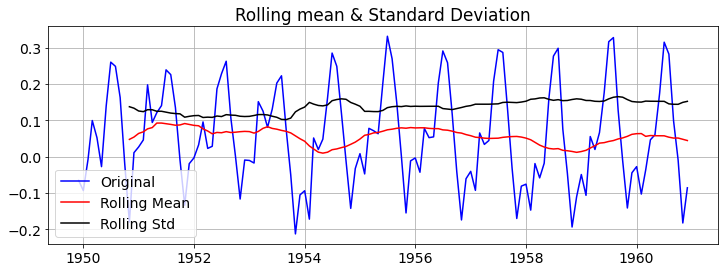

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Valor Critico (1%)              -3.486535
Valor Critico (5%)              -2.886151
Valor Critico (10%)             -2.579896
dtype: float64


In [20]:
test_stationarity(df_log_menos_ma)

Esta metodología sí nos da una serie estacionaria

**3. Restando promedios móviles exponenciales**

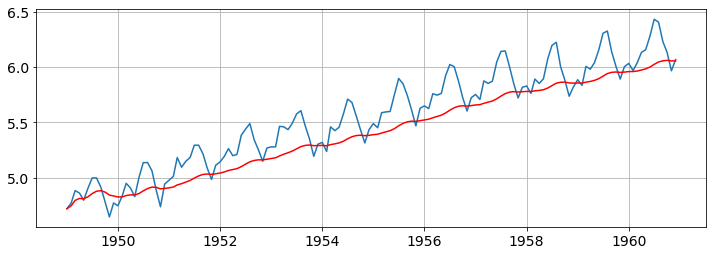

In [21]:
exponential_movingAverage = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_log)
plt.plot(exponential_movingAverage, color='red')

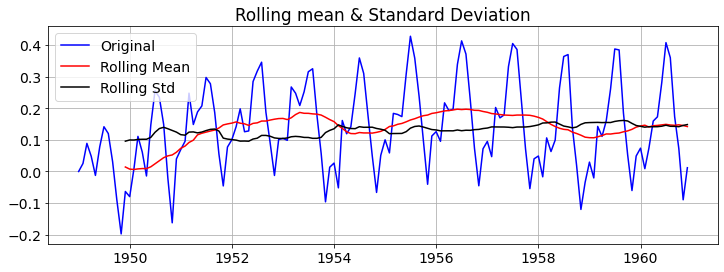

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Valor Critico (1%)              -3.481682
Valor Critico (5%)              -2.884042
Valor Critico (10%)             -2.578770
dtype: float64


In [22]:
df_log_minus_ma_exp = df_log - exponential_movingAverage
test_stationarity(df_log_minus_ma_exp)

Esta metodología también nos da una serie estacionaria

**4. Diferenciar el valor anterior**

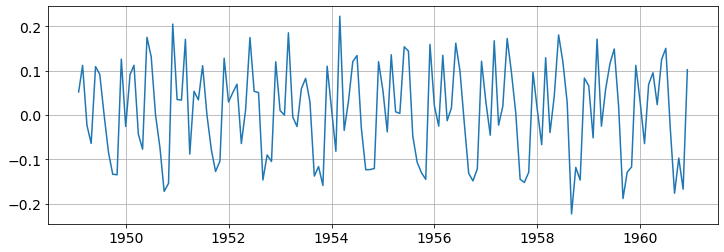

In [23]:
df_log_shift = df_log - df_log.shift()
plt.plot(df_log_shift)
plt.show()

In [24]:
df_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [25]:
df_log_shift.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


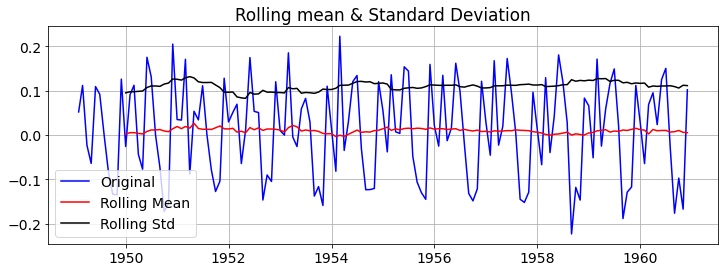

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Valor Critico (1%)              -3.482501
Valor Critico (5%)              -2.884398
Valor Critico (10%)             -2.578960
dtype: float64


In [26]:
df_log_shift.dropna(inplace=True)
test_stationarity(df_log_shift)

Este es el método más utilizado pero para este conjunto de datos en especial este método no hizo que nuestra serie sea estacionaria

La ventaja de este método es que podemos diferenciar las veces que necesitemos

**Descomposición estacional**

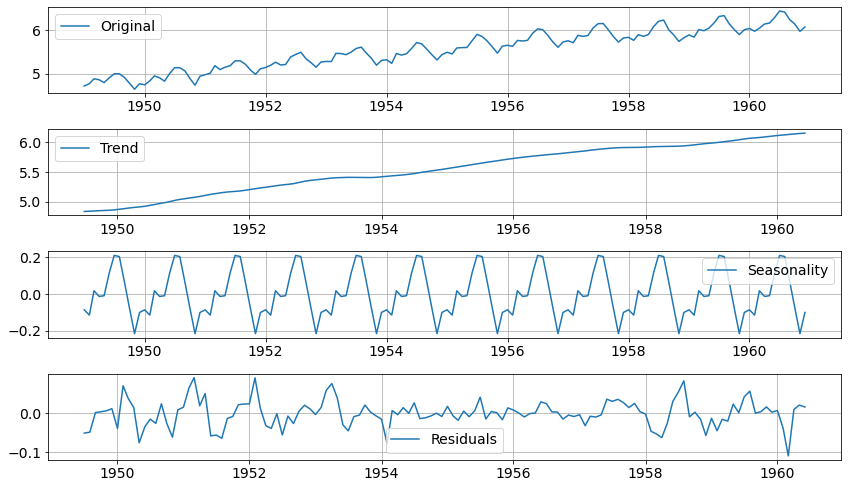

In [27]:
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize =(12,7))
plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

df_log_decomposition = residual
df_log_decomposition.dropna(inplace=True)



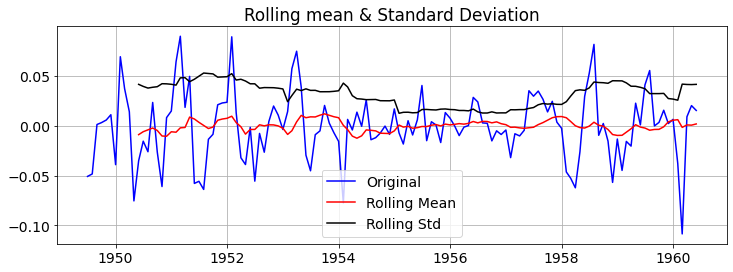

In [28]:
 
#graficar
movingAverage = df_log_decomposition.rolling(window=12).mean()
movingStd = df_log_decomposition.rolling(window=12).std()
original = plt.plot(df_log_decomposition, color='blue', label='Original')
promedio = plt.plot(movingAverage, color='red', label='Rolling Mean')
std= plt.plot(movingStd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean & Standard Deviation')
plt.show(block=False)


In [29]:
#Dickey fuller  
dftest = adfuller(df_log_decomposition.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Valor Critico (%s)'%key]=value
print(dfoutput)

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Valor Critico (1%)            -3.485122e+00
Valor Critico (5%)            -2.885538e+00
Valor Critico (10%)           -2.579569e+00
dtype: float64


### Modelo ARMA

#### Modelo Auto Regresivo (AR)

El precio de hoy tiene una relación con el precio periodos anteriores

**AR(1)**

$$P(hoy) = Promedio + Coef * P(Ayer) + Ruido$$

$$P(t) = \mu + \gamma_{1} * P(t-1) + \epsilon$$

*Si gamma=0, el modelo es el promedio más ruido*

**AR(2)**

$$P(t) = \mu + \gamma_{1} * P(t-1) + \gamma_{2} * P(t-2)+ \epsilon$$

#### Modelo de promedios móviles (MA)

El precio de hoy tiene una relación con el ruido de periodos anteriores

**MA(1)**

$$P(t) = \mu + \theta_{1} * \epsilon(t-1) + \epsilon(t)$$

**MA(1)**

$$P(t) = \mu + \theta_{2} * \epsilon(t-2) + \theta_{1} * \epsilon(t-1)+ \epsilon(t)$$


#### Modelo ARMA

Es una combinación de los dos modelos

**ARMA(1,1)**

$$P(t) = \mu + \gamma_{1} * P(t-1)+ \theta_{1} * \epsilon(t-1) + \epsilon(t)$$

**ARMA(1,2)**

$$P(t) = \mu + \gamma_{1} * P(t-1)+ \theta_{1} * \epsilon(t-1) + \theta_{2} * \epsilon(t-2) +\epsilon(t)$$

**ARMA(2,1)**

$$P(t) = \mu + \gamma_{1} * P(t-1)+ \gamma_{2} * P(t-2)+\theta_{1} * \epsilon(t-1) + \epsilon(t)$$

A la relación con los periodos anteriores se les llama rezagos

#### Encontrar los rezagos para el modelo de AR y para el modelo MA

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


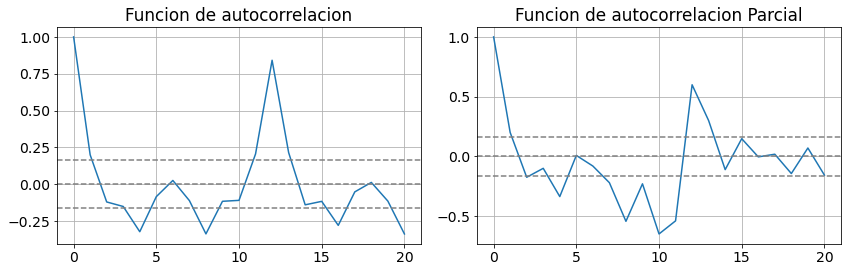

In [30]:
#ACF y PACF plots:
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')


#graficar ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelacion')

#graficar PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelacion Parcial')
plt.tight_layout()

In [31]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [32]:
arma_order_select_ic(df_log_shift)

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

{'bic':             0           1           2
 0 -225.639206 -228.618781 -228.527575
 1 -226.497365 -229.756336 -250.375467
 2 -225.753257 -255.336996 -269.503740
 3 -222.137562 -252.308123 -249.418687
 4 -232.957928 -253.670744 -253.229736,
 'bic_min_order': (2, 2)}

### Modelo AR

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided,

Text(0.5, 1.0, 'RSS: 1.5023')

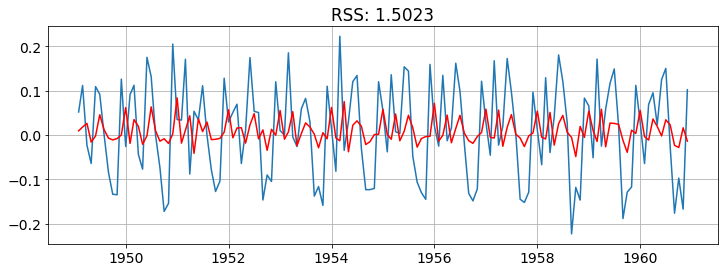

In [33]:
from statsmodels.tsa.arima_model import ARIMA
#Modelo AR
model = ARIMA(df_log, order=(2,1,0)) #(p,I,q)
results_AR = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-df_log_shift['#Passengers'])**2))
#mientras más pequño el error, mejor

El modelo AR no se parece mucho a los datos originales

### Modelo MA

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.4721')

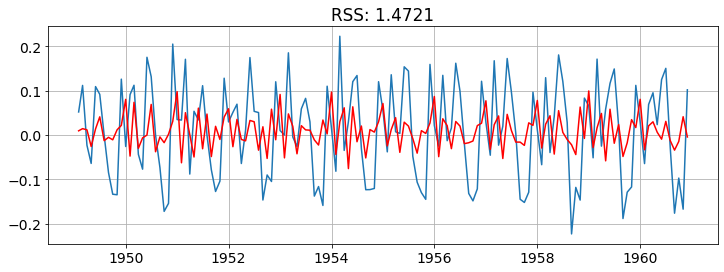

In [34]:
#Modelo ma
model = ARIMA(df_log, order=(0,1,2)) #(p,I,q)
results_MA = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-df_log_shift['#Passengers'])**2))
#mientras más pequño el error, mejor

### Modelo ARIMA


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA

Text(0.5, 1.0, 'RSS: 1.0292')

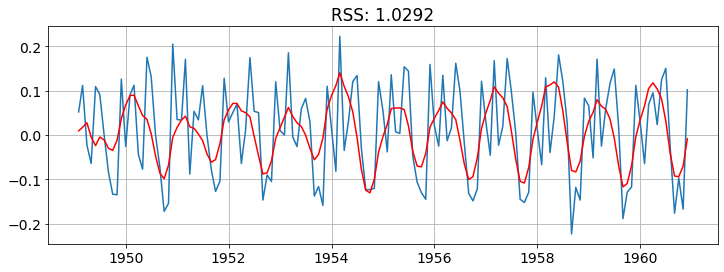

In [35]:
#Modelo ARIMA
model = ARIMA(df_log, order=(2,1,2)) #(p,I,q)
results_ARIMA = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-df_log_shift['#Passengers'])**2))
#mientras más pequño el error, mejor

#### Predicciones

In [36]:
predicciones_log_dif = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicciones_log_dif)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


Recordemos que las prediccione están log diferenciadas. Necesitamos convertirlas a su forma original

In [37]:
#convertir a suma acumulativa para revertir la diferenciación /shift
predicciones_dif_acum = predicciones_log_dif.cumsum()
print(predicciones_dif_acum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372552
1960-09-01    1.280202
1960-10-01    1.186189
1960-11-01    1.116265
1960-12-01    1.108138
Length: 143, dtype: float64


In [38]:
predicciones_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)
predicciones_log = predicciones_log.add(predicciones_dif_acum, fill_value=0)
predicciones_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

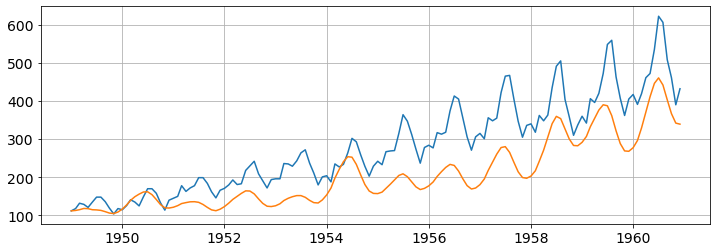

In [39]:
#Revertir el logaritmo
predicciones = np.exp(predicciones_log)
plt.plot(df)
plt.plot(predicciones)
plt.show()

In [40]:
predicciones.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073414
1949-04-01    118.301987
1949-05-01    117.768363
dtype: float64

In [41]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


No es muy buen modelo pero sí toma en cuenta las tendencias de los datos originales

¿Porqué no es tan bueno?
- los datos no eran estacionarios (el pvalue era 0.07)
- usar modelos que tomen en cuenta la estacionalidad
- es un modelo muy simple, podríamos utilizar otros modelos y hacer pruebas con diferentes combinaciones de rezagos

**¿Podemos dividir en test/train?**

Sí pero no...

A diferencia del análisis de datos transversales, el análisis de datos de series de tiempo no puede hacer un muestreo aleatorio.

Esto hace que el análisis de datos de series de tiempo sea mucho más complejo y exigente computacionalmente que el análisis de datos transversales. 

El muestreo aleatorio no se puede utilizar porque los valores pasados de una variable casi siempre están altamente correlacionados con el valor presente de esa variable.
